<a href="https://colab.research.google.com/github/cagvanderaa/Blog-group-47/blob/main/Group_47.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This google colab was created by Deep Learning group 47 (CS4240) #

In [ ]:
# import all necessary modules/libraries for pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# import modules/libraries to access data base files
import sqlite3 as sq3
import pandas.io.sql as pds
import pandas as pd
from google.colab import drive
import numpy as np

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# create variable 'path_to_news' and 'path_to_tcga' and connect
# path_to_news = '/content/drive/MyDrive/news.db'
path_to_tcga = '/content/drive/MyDrive/tcga.db'

# connect_news = sq3.connect(path_to_news)
connect_tcga = sq3.connect(path_to_tcga)

In [ ]:
# # check if the news data is available by printing the contents
# df_news = pd.read_sql_query("SELECT * from sqlite_master", connect_news)
# print(df_news)

In [ ]:
# # this cell prints the first 5 table called 'news'
# news_table = pd.read_sql_query("SELECT * from news", connect_news)
# print(news_table.head())

In [ ]:
# check if the tcga data is available by printing the contents
df_tcga = pd.read_sql_query("SELECT * from sqlite_master", connect_tcga)
print(df_tcga)

    type                            name     tbl_name  rootpage  \
0  table                        clinical     clinical         2   
1  index     sqlite_autoindex_clinical_1     clinical         3   
2  table                          rnaseq       rnaseq         4   
3  index       sqlite_autoindex_rnaseq_1       rnaseq         5   
4  table                     methylation  methylation         6   
5  index  sqlite_autoindex_methylation_1  methylation         7   
6  table                             snp          snp         8   
7  index          sqlite_autoindex_snp_1          snp         9   
8  index                    rnaseq_index       rnaseq   1685603   

                                                 sql  
0  CREATE TABLE clinical(id TEXT NOT NULL PRIMARY...  
1                                               None  
2  CREATE TABLE rnaseq(id TEXT NOT NULL PRIMARY K...  
3                                               None  
4  CREATE TABLE methylation(id TEXT NOT NULL PRIM...  

In [ ]:
# this cell prints the first 5 rows of the table for 'clinical' from tcga
clinical_table = pd.read_sql_query("SELECT * from clinical", connect_tcga)
print(clinical_table)

                 id  age  gender icd10_diagnosis dataset_name  days_to_death  \
0      TCGA-OR-A5K0   69       1           C74.0          ACC             -1   
1      TCGA-OR-A5KP   45       1           C74.0          ACC             -1   
2      TCGA-OR-A5L5   77       1           C74.0          ACC             -1   
3      TCGA-OR-A5LB   59       1           C74.0          ACC           1204   
4      TCGA-P6-A5OG   45       1           C74.0          ACC            383   
...             ...  ...     ...             ...          ...            ...   
11153  TCGA-YZ-A980   75       1          C69.30          UVM             -1   
11154  TCGA-YZ-A982   79       1          C69.90          UVM             -1   
11155  TCGA-YZ-A983   51       1          C69.30          UVM             -1   
11156  TCGA-YZ-A984   50       1          C69.30          UVM             -1   
11157  TCGA-YZ-A985   41       1          C69.30          UVM             -1   

       days_to_recurrence  days_to_surg

In [ ]:
# this cell prints the first 5 rows of the table for 'rnaseq' from tcga
rnaseq_table = pd.read_sql_query("SELECT * from rnaseq", connect_tcga)
rnaseq_table['data'] = [np.frombuffer(element) for element in rnaseq_table['data']]
print(rnaseq_table)

                                 id  \
0      TCGA-OR-A5J1-01A-11R-A29S-07   
1      TCGA-OR-A5J2-01A-11R-A29S-07   
2      TCGA-OR-A5J3-01A-11R-A29S-07   
3      TCGA-OR-A5J5-01A-11R-A29S-07   
4      TCGA-OR-A5J6-01A-31R-A29S-07   
...                             ...   
10441  TCGA-YZ-A980-01A-11R-A405-07   
10442  TCGA-YZ-A982-01A-11R-A405-07   
10443  TCGA-YZ-A983-01A-11R-A405-07   
10444  TCGA-YZ-A984-01A-11R-A405-07   
10445  TCGA-YZ-A985-01A-11R-A405-07   

                                                    data   clinical_id  
0      [1.87585068940037e-309, 1.1711999948023525e+17...  TCGA-OR-A5J1  
1      [1.87585068940037e-309, 1.1711999948023525e+17...  TCGA-OR-A5J2  
2      [1.87585068940037e-309, 1.1711999948023525e+17...  TCGA-OR-A5J3  
3      [1.87585068940037e-309, 1.1711999948023525e+17...  TCGA-OR-A5J5  
4      [1.87585068940037e-309, 1.1711999948023525e+17...  TCGA-OR-A5J6  
...                                                  ...           ...  
10441  [1.8758506894

In [ ]:
# # this cell prints the first 5 rows of the table for 'methylation' from tcga
# meth_table = pd.read_sql_query("SELECT * from methylation", connect_tcga)
# # meth_table['data'] = [np.frombuffer(i) for i in rnaseq_table['data']]
# print(meth_table)

In [ ]:
# # this cell prints the first 5 rows of the table for 'snp' from tcga
# snp_table = pd.read_sql_query("SELECT * from snp", connect_tcga)
# # snp_table['data'] = [np.frombuffer(i) for i in rnaseq_table['data']]
# print(snp_table)

In [ ]:
# we can see that rnaseq has data corresponding to 10446 patients and that clinical corresponds to 11158 patients
# this cell filters out the patients that do not correspond and places the rows in the correct order

# first get patient ids that appear in both dataframes
common_patients = set(rnaseq_table['clinical_id']).intersection(set(clinical_table['id']))

#filter out the patients that do not occur in both dataframes
rnaseq_table_filtered = rnaseq_table[rnaseq_table['clinical_id'].isin(common_patients)].copy()
clinical_table_filtered = clinical_table[clinical_table['id'].isin(common_patients)].copy()

# remove duplicates from both dataframes
rnaseq_table_filtered.drop_duplicates(subset='clinical_id', keep='first', inplace=True)
clinical_table_filtered.drop_duplicates(subset='id', keep='first', inplace=True)

#sort data frames so that rows correspond to each other
rnaseq_table_filtered.sort_values(by=['clinical_id'], inplace=True)
clinical_table_filtered.sort_values(by=['id'], inplace=True)

# print to check length of dataframes
print(rnaseq_table_filtered)
print(clinical_table_filtered)

                                 id  \
2749   TCGA-02-0047-01A-01R-1849-01   
2750   TCGA-02-0055-01A-01R-1849-01   
2751   TCGA-02-2483-01A-01R-1849-01   
2752   TCGA-02-2485-01A-01R-1849-01   
2753   TCGA-02-2486-01A-01R-1849-01   
...                             ...   
5629   TCGA-ZS-A9CF-01A-11R-A38B-07   
5631   TCGA-ZS-A9CG-01A-11R-A37K-07   
10107  TCGA-ZT-A8OM-01A-11R-A42S-07   
2070   TCGA-ZU-A8S4-11A-11R-A41I-07   
2026   TCGA-ZX-AA5X-01A-11R-A42T-07   

                                                    data   clinical_id  
2749   [1.87585068940037e-309, 1.1711999948023525e+17...  TCGA-02-0047  
2750   [1.87585068940037e-309, 1.1711999948023525e+17...  TCGA-02-0055  
2751   [1.87585068940037e-309, 1.1711999948023525e+17...  TCGA-02-2483  
2752   [1.87585068940037e-309, 1.1711999948023525e+17...  TCGA-02-2485  
2753   [1.87585068940037e-309, 1.1711999948023525e+17...  TCGA-02-2486  
...                                                  ...           ...  
5629   [1.8758506894

In [ ]:
# # make it all a tensor
# rnaseq_list = rnaseq_table_filtered['data'].tolist()
# rnaseq_tensor_untouched = torch.tensor(rnaseq_list)

# # create tensors of the treatment and of recurrence, all values in these tensors must be boolean
# treatment_list_untouched = []
# medication = np.ones(len(clinical_table_filtered)).tolist()
# treatment_list_untouched.append(medication)
# treatment_list_untouched.append(clinical_table_filtered['did_radiation_therapy'].tolist())
# treatment_list_untouched.append(clinical_table_filtered['days_to_surgery'].tolist())
# recurrence_tensor_untouched = torch.tensor(clinical_table_filtered['days_to_recurrence'].tolist())
# treatment_tensor_untouched = torch.transpose(torch.tensor(treatment_list_untouched), 0, 1)
# print(f"rnaseq tensor size is: {rnaseq_tensor.size()} \nTreatment tensor untouched size is: {treatment_tensor_untouched.size()} \nRecurrence tensor untouched size is: {recurrence_tensor_untouched.size()}")

In [ ]:
# print(rnaseq_tensor_untouched)
# print(treatment_tensor_untouched)
# print(recurrence_tensor_untouched)

In [ ]:
# set all values in clinical_table_filtered to 0 or 1
surgery_list = clinical_table_filtered['days_to_surgery'].tolist()
for i in range(len(surgery_list)):
  if surgery_list[i] >= 0:
    surgery_list[i] = 1
  else:
    surgery_list[i] = 0

recurrence_list = clinical_table_filtered['days_to_recurrence'].tolist()
for i in range(len(recurrence_list)):
  if recurrence_list[i] >= 0:
    recurrence_list[i] = 1
  else:
    recurrence_list[i] = 0

# make rnaseq_list a tensor
rnaseq_list = rnaseq_table_filtered['data'].tolist()
rnaseq_tensor = torch.tensor(rnaseq_list)

# create tensors of the treatment and of the recurrence, all values in these tensors must be boolean
treatment_list = []
medication = np.ones(len(clinical_table_filtered)).tolist()
treatment_list.append(medication)
treatment_list.append(clinical_table_filtered['did_radiation_therapy'].tolist())
treatment_list.append(surgery_list)
recurrence_tensor = torch.tensor(recurrence_list)
treatment_tensor = torch.transpose(torch.tensor(treatment_list), 0, 1)
print(f"rnaseq tensor size is: {rnaseq_tensor.size()} \nTreatment tensor size is: {treatment_tensor.size()} \nRecurrence tensor size is: {recurrence_tensor.size()}")

rnaseq tensor size is: torch.Size([9659, 20547]) 
Treatment tensor size is: torch.Size([9659, 3]) 
Recurrence tensor size is: torch.Size([9659])


<ipython-input-14-00b544b1ad4a>:18: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  rnaseq_tensor = torch.tensor(rnaseq_list)


In [ ]:
# # some of the features in rna_seq tensor have 'nan' or 'inf', this needs to be filtered out
# nan_mask = torch.isnan(rnaseq_tensor)
# inf_mask = torch.isinf(rnaseq_tensor)

# # combine the indices of NaN and inf values
# nan_or_inf_mask = nan_mask | inf_mask
# nan_or_inf_indices = torch.nonzero(nan_or_inf_mask)

# # filter out the elements with NaN or inf values
# rnaseq_tensor = rnaseq_tensor[~nan_or_inf_mask]


# standardise the rna_seq tensor
mean = torch.mean(rnaseq_tensor, axis=0)
std = torch.std(rnaseq_tensor, axis=0)
rnaseq_tensor = (rnaseq_tensor - mean)/std

print(rnaseq_tensor)

# # filter out inf and nan values
flattened_rnaseq_tensor = rnaseq_tensor.reshape(-1)
finite_indices = torch.isfinite(flattened_rnaseq_tensor)

flattened_rnaseq_tensor_filtered = flattened_rnaseq_tensor[finite_indices]
rnaseq_tensor = flattened_rnaseq_tensor_filtered.reshape(len(rnaseq_tensor), -1)

tensor([[    nan,     nan,     inf,  ..., -0.4644, -0.3369, -0.1502],
        [    nan,     nan,     inf,  ..., -0.1314, -0.3255, -0.1502],
        [    nan,     nan,     inf,  ..., -0.1683,  0.4678, -0.1502],
        ...,
        [    nan,     nan,     inf,  ..., -1.3342,  0.2173, -0.1502],
        [    nan,     nan,     inf,  ..., -0.7794, -0.3240,  4.7742],
        [    nan,     nan,     inf,  ...,  0.2653, -0.0477, -0.1502]],
       dtype=torch.float64)


In [ ]:
print(rnaseq_tensor)

tensor([[-0.1602, -0.6326, -0.3969,  ..., -0.4644, -0.3369, -0.1502],
        [-0.1602, -0.8562,  0.1784,  ..., -0.1314, -0.3255, -0.1502],
        [-0.1602, -0.6418,  0.0652,  ..., -0.1683,  0.4678, -0.1502],
        ...,
        [-0.1602, -0.6490, -0.6984,  ..., -1.3342,  0.2173, -0.1502],
        [-0.1602, -0.7282, -0.7357,  ..., -0.7794, -0.3240,  4.7742],
        [-0.1602,  0.0053,  1.0942,  ...,  0.2653, -0.0477, -0.1502]],
       dtype=torch.float64)


In [ ]:
# check if the treatment tensor has the right size and contains only booleans
print(treatment_tensor[0])

tensor([1., 1., 0.])


In [ ]:
# here we create a new list containing values 0, 1, 2 or 3
# 0 corresponds to only medication being used alone
# 1 corresponds to medication and radiotherapy being used together
# 2 corresponds to medication and surgery being used together
# 3 corresponds to all 3 being used together
treatment_method = []
for i in range(len(treatment_tensor)):
  if torch.allclose(treatment_tensor[i], torch.tensor([1., 0., 0.])):
    treatment_method.append(0)
  elif torch.allclose(treatment_tensor[i], torch.tensor([1., 1., 0.])):
    treatment_method.append(1)
  elif torch.allclose(treatment_tensor[i], torch.tensor([1., 0., 1.])):
    treatment_method.append(2)
  else:
    treatment_method.append(3)

treatment_method_tensor = torch.reshape(torch.tensor(treatment_method), (len(treatment_method), 1))

In [ ]:
# quick check
print(f"rnaseq_tensor : \n{rnaseq_tensor}")

print(f"treatment_method_tensor : \n{treatment_method_tensor}")

print(f"recurrence_tensor : \n{recurrence_tensor}")

rnaseq_tensor : 
tensor([[-0.1602, -0.6326, -0.3969,  ..., -0.4644, -0.3369, -0.1502],
        [-0.1602, -0.8562,  0.1784,  ..., -0.1314, -0.3255, -0.1502],
        [-0.1602, -0.6418,  0.0652,  ..., -0.1683,  0.4678, -0.1502],
        ...,
        [-0.1602, -0.6490, -0.6984,  ..., -1.3342,  0.2173, -0.1502],
        [-0.1602, -0.7282, -0.7357,  ..., -0.7794, -0.3240,  4.7742],
        [-0.1602,  0.0053,  1.0942,  ...,  0.2653, -0.0477, -0.1502]],
       dtype=torch.float64)
treatment_method_tensor : 
tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])
recurrence_tensor : 
tensor([1, 1, 0,  ..., 0, 1, 0])


Only medication = 6341 
Medication and radiotherapy together = 2776 
Medication and surgery together = 272 
All together = 270


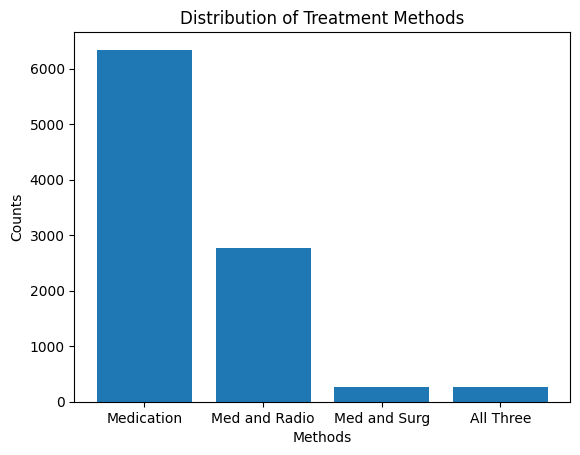

In [ ]:
# it might be interesting to check the treatment method distribution
only_med = 0
med_and_rad = 0
med_and_surg = 0
all_methods = 0
for i in range(len(treatment_method_tensor)):
  if torch.allclose(treatment_method_tensor[i], torch.tensor([0])):
    only_med += 1
  elif torch.allclose(treatment_method_tensor[i], torch.tensor([1])):
    med_and_rad += 1
  elif torch.allclose(treatment_method_tensor[i], torch.tensor([2])):
    med_and_surg += 1
  else:
    all_methods += 1

print(f"Only medication = {only_med} \nMedication and radiotherapy together = {med_and_rad} \nMedication and surgery together = {med_and_surg} \nAll together = {all_methods}")

# generate a bar chart to show this distribution
import matplotlib.pyplot as plt

# Sample data
methods = ['Medication', 'Med and Radio', 'Med and Surg', 'All Three']
counts = [only_med, med_and_rad, med_and_surg, all_methods]

# Create bar chart
plt.bar(methods, counts)

# Add title and labels
plt.title('Distribution of Treatment Methods')
plt.xlabel('Methods')
plt.ylabel('Counts')

# Display the chart
plt.show()

In [ ]:
# create class so that you can iterate over the dataloader
from torch.utils.data import Dataset, DataLoader

class CancerRecurrenceDataset(Dataset):
    def __init__(self, input_data, treatment_data, target_data):
        self.input_data = input_data
        self.treatment_data = treatment_data
        self.target_data = target_data

    def __len__(self):
        return len(self.target_data)

    def __getitem__(self, idx):
        input_data = self.input_data[idx]
        treatment_data = self.treatment_data[idx]
        target_data = self.target_data[idx]
        return input_data, treatment_data, target_data

In [ ]:
# CancerRecurrenceNetwork architecture
# all data goes through the same base layers and then (depending on which treatment method is applied) follows a certain treatment layer
class CRNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_treatments):
        super(CRNet, self).__init__()
        
        self.input_dim = input_dim
        self.num_treatments = num_treatments
        self.hidden_dim = hidden_dim

        # Base Layers
        self.base_layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )
        
        # Treatment Layers
        self.treatment_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(hidden_dim, hidden_dim),
                nn.ReLU(),
                nn.Linear(hidden_dim, hidden_dim),
                nn.ReLU(),
                nn.Linear(hidden_dim, hidden_dim),
                nn.ReLU(),
                nn.Linear(hidden_dim, 1)
            ) for _ in range(self.num_treatments)
        ])

        # Softmax Activation
        self.softmax = nn.Softmax(dim=1)
        self.relu = nn.ReLU()

    def forward(self, x, treatment_tensor):
        # Base Layers
        x = self.base_layers(x)

        # Treatment Layers
        outputs = []
        for i in range(self.num_treatments):
            if i == 0 and (treatment_tensor == 0).sum() > 0:
                # Only Medication
                indices = torch.where(treatment_tensor == 0)[0]
                output = self.treatment_layers[i](x[indices])
                outputs.append(output)
                
            elif i == 1 and (treatment_tensor == 1).sum() > 0:
                # Medication and Radiotherapy
                indices = torch.where(treatment_tensor == 1)[0]
                output = self.treatment_layers[i](x[indices])
                outputs.append(output)
                
            elif i == 2 and (treatment_tensor == 2).sum() > 0:
                # Medication and Surgery
                indices = torch.where(treatment_tensor == 2)[0]
                output = self.treatment_layers[i](x[indices])
                outputs.append(output)
                
            elif i == 3 and (treatment_tensor == 3).sum() > 0:
                # Medication, Radiotherapy and Surgery
                indices = torch.where(treatment_tensor == 3)[0]
                output = self.treatment_layers[i](x[indices])
                outputs.append(output)
        
        # Combine outputs

        outputs = torch.cat(outputs, dim=0).flatten()

        return outputs


In [ ]:
# Set device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Set hyperparameters
input_dim = len(rnaseq_tensor[0])
hidden_dim = 48
num_treatments = 4
batch_size = 32
learning_rate = 0.001
num_epochs = 100

In [ ]:
# dataset and dataloader
input_data = rnaseq_tensor
treatment_data = treatment_method_tensor
target_data = recurrence_tensor

In [ ]:
# split data into training, validation and test set
from sklearn.model_selection import train_test_split

# create train validation and test split
train_idx, val_test_idx = train_test_split(range(len(input_data)), test_size=0.37, random_state=42)
val_idx, test_idx = train_test_split(val_test_idx, test_size=0.21, random_state=42)

# split  data tensors and set to correct dtype
input_train = input_data[train_idx].type(torch.float32)
target_train = target_data[train_idx].type(torch.float32)
treatment_train = treatment_data[train_idx].type(torch.float32)

input_val = input_data[val_idx].type(torch.float32)
target_val = target_data[val_idx].type(torch.float32)
treatment_val = treatment_data[val_idx].type(torch.float32)

input_test = input_data[test_idx].type(torch.float32)
target_test = target_data[test_idx].type(torch.float32)
treatment_test = treatment_data[test_idx].type(torch.float32)


In [ ]:
# generate dataloaders from the split datasets
train_dataset = CancerRecurrenceDataset(input_train, treatment_train, target_train)
validation_dataset = CancerRecurrenceDataset(input_val, treatment_val, target_val)
test_dataset = CancerRecurrenceDataset(input_test, treatment_test, target_test)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size)
validation_dataloader = DataLoader(validation_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
# create model and move to device
model = CRNet(input_dim, hidden_dim, num_treatments).to(device)

In [ ]:
# loss and updater
criterion = nn.MSELoss()
# nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# function that trains and validates the model
def train_and_validate_model(model, train_dataloader, val_dataloader, test_dataloader, optimizer, criterion, device, num_epochs):
    
    # these two are needed for early stopping
    best_valid_loss = float('inf')
    epochs_since_improvement = 0

    # create empty lists to save the losses and accuracies
    train_losses = []
    train_accs = []
    valid_losses = []
    valid_accs = []

    # loop over number of epochs, in here the training and validation is done
    for epoch in range(num_epochs):
        running_loss = 0.0
        running_corrects = 0

        # train the model on the training set
        model.train()
        for inputs, treatments, labels in train_dataloader:
            inputs = inputs.to(device).float()
            treatments = treatments.to(device).float()
            labels = labels.to(device).float()

            optimizer.zero_grad()

            outputs = model.forward(inputs, treatments)
            batch_size = inputs.size(0)

            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item() * batch_size
            running_corrects += torch.sum(torch.round(torch.sigmoid(outputs)) == labels)

        epoch_loss = running_loss / len(train_dataloader.dataset)
        epoch_acc = running_corrects.double() / len(train_dataloader.dataset)
        train_losses.append(epoch_loss)
        train_accs.append(epoch_acc)

        # evaluate the model on the validation set
        model.eval()

        with torch.no_grad():
          running_val_loss = 0.0
          running_val_corrects = 0

          for inputs, treatments, labels in val_dataloader:
              inputs = inputs.to(device).float()
              treatments = treatments.to(device).float()
              labels = labels.to(device).float()

              outputs = model.forward(inputs, treatments)
              batch_size = inputs.size(0)

              loss = criterion(outputs, labels)

              running_val_loss += loss.item() * batch_size
              running_val_corrects += torch.sum(torch.round(torch.sigmoid(outputs)) == labels)

          epoch_val_loss = running_val_loss / len(val_dataloader.dataset)
          epoch_val_acc = running_val_corrects.double() / len(val_dataloader.dataset)
          valid_losses.append(epoch_val_loss)
          valid_accs.append(epoch_val_acc)

          # implement some early stopping after epoch 3
          # check if validation loss has decreased, if not increment epochs_since_improvement
          if epoch >= 3:  
            if epoch_val_loss < best_valid_loss:
                best_valid_loss = epoch_val_loss
                epochs_since_improvement = 0
                # save the model at this epoch
                torch.save(model.state_dict(), 'best_model.pt')
            else:
                epochs_since_improvement += 1

            # stop training if validation loss has not improved for 6 epochs
            if epochs_since_improvement == 6:
                print("Stopping training, validation loss has not improved for 6 epochs.")
                break

          print(f"Epoch {epoch+1}/{num_epochs}:")
          print(f"  Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")
          print(f"  Val Loss: {epoch_val_loss:.4f} Acc: {epoch_val_acc:.4f}")

    # plot the development of the losses and accuracies during training and validation
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(valid_losses, label='Valid Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Train Acc')
    plt.plot(valid_accs, label='Valid Acc')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.show()
    
    return model


Epoch 1/100:
  Train Loss: 0.0372 Acc: 0.5025
  Val Loss: 0.3149 Acc: 0.3128
Epoch 2/100:
  Train Loss: 0.0364 Acc: 0.5196
  Val Loss: 0.3020 Acc: 0.3309
Epoch 3/100:
  Train Loss: 0.0310 Acc: 0.5234
  Val Loss: 0.3306 Acc: 0.3440
Epoch 4/100:
  Train Loss: 0.0339 Acc: 0.4978
  Val Loss: 0.3235 Acc: 0.3305
Epoch 5/100:
  Train Loss: 0.0315 Acc: 0.5423
  Val Loss: 0.3201 Acc: 0.4024
Epoch 6/100:
  Train Loss: 0.0273 Acc: 0.4925
  Val Loss: 0.3364 Acc: 0.3117
Epoch 7/100:
  Train Loss: 0.0285 Acc: 0.5014
  Val Loss: 0.3459 Acc: 0.2930
Epoch 8/100:
  Train Loss: 0.0316 Acc: 0.4993
  Val Loss: 0.3559 Acc: 0.3964
Epoch 9/100:
  Train Loss: 0.0251 Acc: 0.5655
  Val Loss: 0.3241 Acc: 0.3642
Epoch 10/100:
  Train Loss: 0.0248 Acc: 0.5336
  Val Loss: 0.3373 Acc: 0.3057
Stopping training, validation loss has not improved for 6 epochs.


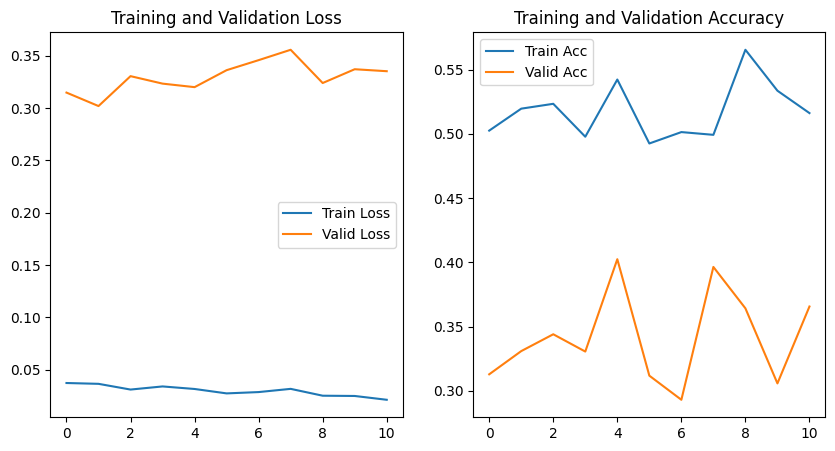

auc: 0.5046387937415013
ap: 0.2993215549315278
f1: 0.5982817729759423
precision: 0.5869473080811424
recall: 0.6138482023968043


In [ ]:
import sklearn

# Initialise training
fitted_model = train_and_validate_model(model, train_dataloader, validation_dataloader, test_dataloader, optimizer, criterion, device, num_epochs)

# perform predictions on the test set
test_pred = fitted_model.forward(input_test, treatment_test)

# convert to numpy so sklearn metrics can be used
test_pred = test_pred.detach().numpy()

# these are the performance metrics
auc = sklearn.metrics.roc_auc_score(target_test, test_pred)
ap = sklearn.metrics.average_precision_score(target_test, test_pred)
f1 = sklearn.metrics.f1_score(target_test, np.round(test_pred), average='weighted')
precision = sklearn.metrics.precision_score(target_test, np.round(test_pred), average='weighted')
recall = sklearn.metrics.recall_score(target_test, np.round(test_pred), average='weighted')

print(f'auc: {auc}')    
print(f'ap: {ap}')    
print(f'f1: {f1}')    
print(f'precision: {precision}')   
print(f'recall: {recall}')     